In [87]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv("../data/german_credit_results/models_data_inaccurate.csv")
xaxis = "data_scale"
NUM_TRAIN = 800
df["data_scale"] = NUM_TRAIN/df["data_scale"]
xaxis_label = "Number of Examples in Training Data"

In [89]:
df = pd.read_csv("../data/german_credit_results/models_models_lockout.csv")
xaxis = "num_models"
xaxis_label = "Number of Decision-Makers"

In [90]:
df.head()

,random_distance,num_models,data_scale,data_seed,model_seed,partition_seed,model_type,application_type,accuracy,acceptance,fairness_spd,fairness_eop,systemic_success,systemic_failure,multiplicity,failure_rate,homogenization_expected_failure,homogenization_avg_failure
0,0.0,1,2,0,NaN,NaN,"('logistic',)",NaN,0.700,0.140,-0.088542,-0.183030,0.140,0.860,0.000000e+00,0.860,1.0,1.0
1,0.1,1,2,0,NaN,NaN,"('logistic',)",NaN,0.695,0.185,-0.028646,-0.023030,0.185,0.815,0.000000e+00,0.815,1.0,1.0
2,0.2,1,2,0,NaN,NaN,"('logistic',)",NaN,0.700,0.180,-0.085938,-0.163636,0.180,0.820,1.110223e-16,0.820,1.0,1.0
3,0.3,1,2,0,NaN,NaN,"('logistic',)",NaN,0.640,0.250,0.086806,0.016970,0.250,0.750,0.000000e+00,0.750,1.0,1.0
4,0.4,1,2,0,NaN,NaN,"('logistic',)",NaN,0.720,0.240,0.015625,-0.195152,0.240,0.760,0.000000e+00,0.760,1.0,1.0


In [91]:
df = df[["random_distance", xaxis, "accuracy", "acceptance", "fairness_spd", "fairness_eop", 
         "systemic_success", "systemic_failure", "multiplicity", "failure_rate", "homogenization_expected_failure", "homogenization_avg_failure"]]
df = df.groupby(["random_distance", xaxis]).mean().reset_index(drop=False)

In [92]:
def plot(df, title, metric, ylog=False):
    plt.rcParams["figure.figsize"] = [7,3]
    fig, ax = plt.subplots()

    plt.plot(df.loc[df["random_distance"]==0, xaxis], df.loc[df["random_distance"]==0, metric], '*-', color='#00060e', label="Threshold")
    plt.plot(df.loc[df["random_distance"]==0.1, xaxis], df.loc[df["random_distance"]==0.1, metric], '*-', color='#001e49', label="Random(0.4,0.6)")
    plt.plot(df.loc[df["random_distance"]==0.2, xaxis], df.loc[df["random_distance"]==0.2, metric], '*-', color='#002f70', label="Random(0.3,0.7)")
    plt.plot(df.loc[df["random_distance"]==0.3, xaxis], df.loc[df["random_distance"]==0.3, metric], '*-', color='#003f97', label="Random(0.2,0.8)")
    plt.plot(df.loc[df["random_distance"]==0.4, xaxis], df.loc[df["random_distance"]==0.4, metric], '*-', color='#004fbf', label="Random(0.1,0.9)")
    plt.plot(df.loc[df["random_distance"]==0.5, xaxis], df.loc[df["random_distance"]==0.5, metric], '*-', color='#0068f9', label="All Random")
  
    #plt.ylim(0,1)
    if ylog:
        plt.yscale('log')   

    plt.xlabel(xaxis_label)
    plt.ylabel(metric)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    fig.tight_layout()
    plt.show()

# Homogenization By Data Scale

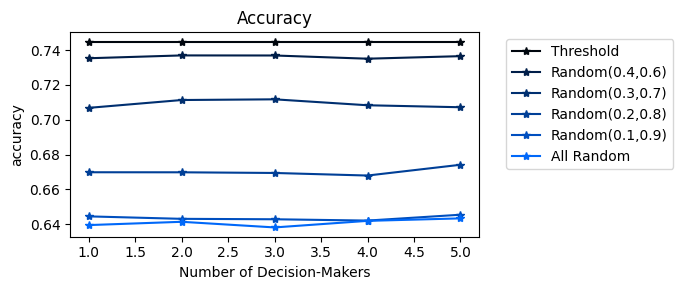

In [93]:
plot(df, "Accuracy", "accuracy")

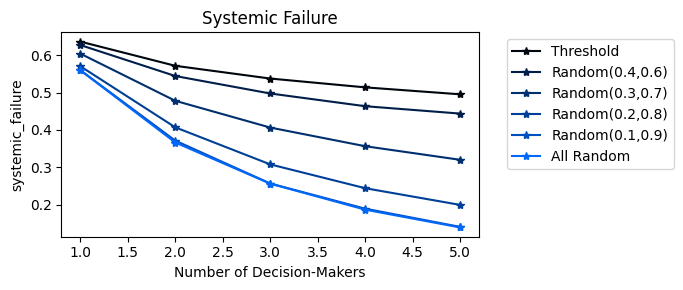

In [94]:
plot(df, "Systemic Failure", "systemic_failure")

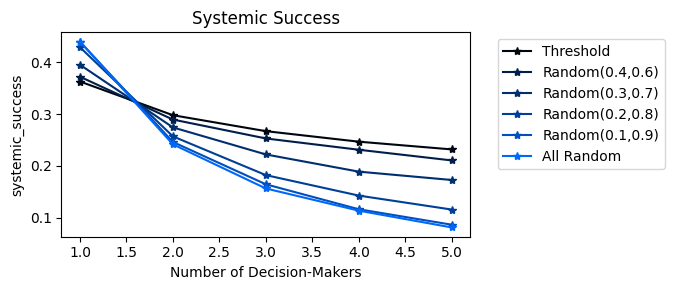

In [95]:
plot(df, "Systemic Success", "systemic_success")

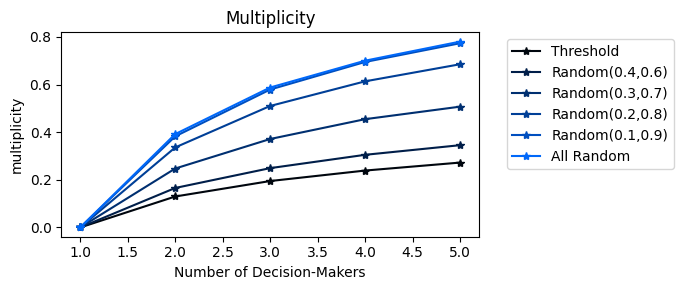

In [96]:
plot(df, "Multiplicity", "multiplicity")

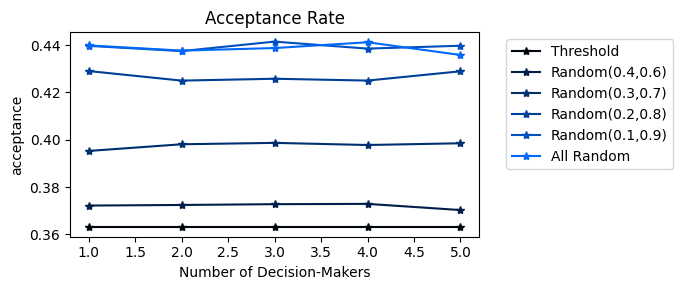

In [97]:
plot(df, "Acceptance Rate", "acceptance")

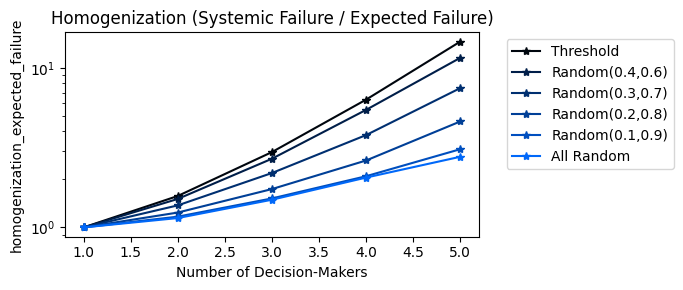

In [98]:
plot(df, "Homogenization (Systemic Failure / Expected Failure)", "homogenization_expected_failure", True)

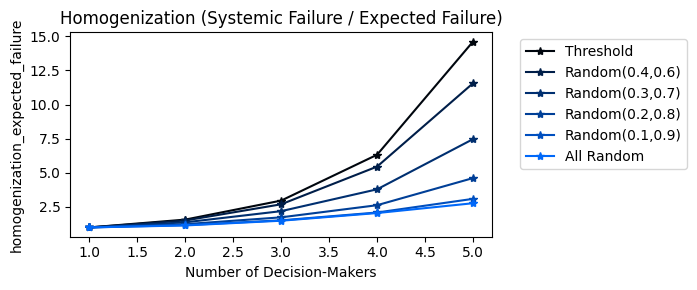

In [99]:
plot(df, "Homogenization (Systemic Failure / Expected Failure)", "homogenization_expected_failure", False)

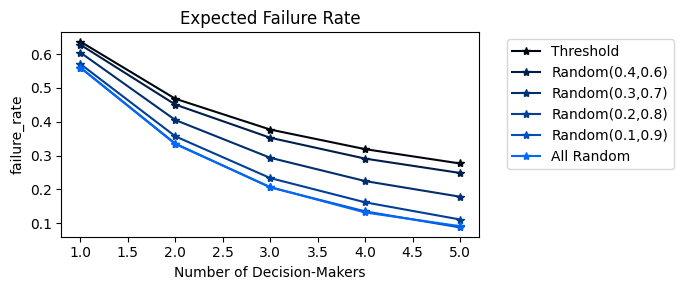

In [100]:
plot(df, "Expected Failure Rate", "failure_rate", False)

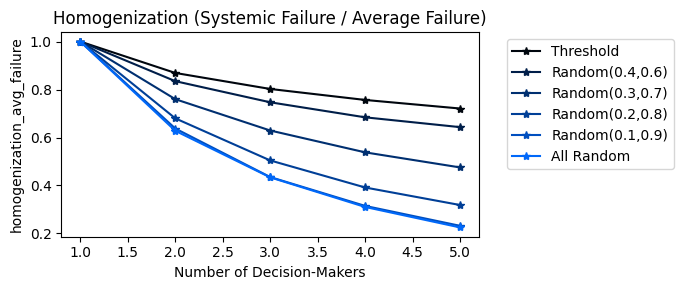

In [101]:
plot(df, "Homogenization (Systemic Failure / Average Failure)", "homogenization_avg_failure")

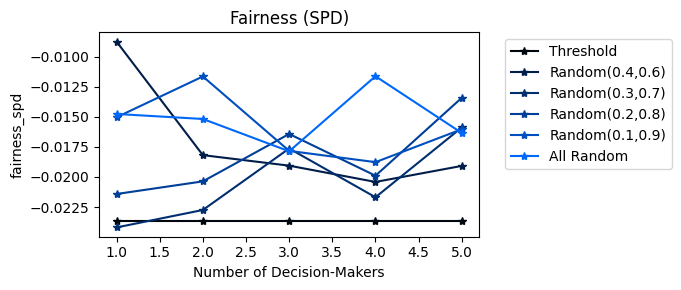

In [102]:
plot(df, "Fairness (SPD)", "fairness_spd", False)

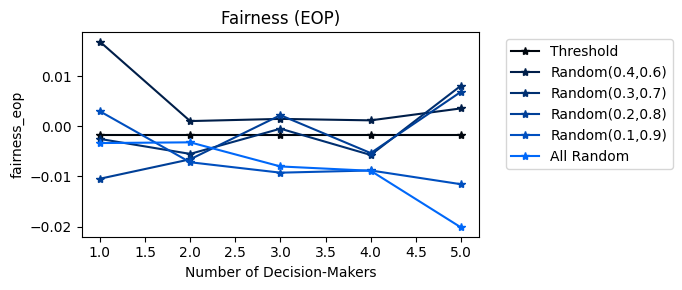

In [103]:
plot(df, "Fairness (EOP)", "fairness_eop", False)